# Carido Fitness Data - Exploratory Analysis

**Context** - The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run

## Objective
To understand the data and provide following
- Customer Profile for various products
- Perform Univariate & Multivariate Analysis
- Provide Insights and recommendation that will help for marketing

## Header section, All necessary packages to be imported that would help in further analyze to inference information

In [3]:
# Libraries imported for further usage in analysis
import pandas as pd # Pandas Library helps to manipulate the data by loading into Dataframe
import numpy as np #Numpy package would be used for various Array related operations
import matplotlib.pyplot as plt #Base package used for Visulaization
import seaborn as sns # Library used for statistical visualization for understanding data better
# helps to execute the charts.
%matplotlib inline 

import warnings # Libray to suppress warnings and any deprecated package info for Prod scenario **not to be used in development environment
warnings.filterwarnings('ignore')

### Load the provided CSV dataset in to Pandas Dataframe for Exploratory Analysis

In [100]:
Cardio_data = pd.read_csv("../Downloads/CardioGoodFitness.csv")

In [101]:
# Take a backup of Original data in case we need to revert to Original dataset
Cardio_data_backup = Cardio_data.copy()

### Initial Analysis to have the first look of data

In [102]:
Cardio_data.head() # Head function would retrieve initial 5 rows as default, it can be overwritten by passing corresponding number as arguement to function

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [16]:
Cardio_data.tail() # tail function would help to see last rows of data, having a look at head and tail would give initial feel about data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


## Schema Analysis

In [19]:
Cardio_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Initial Inference**
- Marital Status, Gender are categorical values
- Miles, fitness, Usage, Education & Age are numerical values
- Data is about 3 fitness products



In [47]:
Cardio_data.info() # Provides data structure of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Notes
- No missing values that is good sign

In [103]:
# Convert Categorical values
Cardio_data['MaritalStatus'] = Cardio_data.MaritalStatus.astype('category')
Cardio_data['Product'] = Cardio_data.Product.astype('category')
Cardio_data['Gender'] = Cardio_data.Gender.astype('category')

In [95]:
Cardio_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 10.7 KB


In [49]:
Cardio_data.shape # Check rows & Columns

(180, 9)

### Data sanity check

In [96]:
Cardio_data.isnull() # Check for null values

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

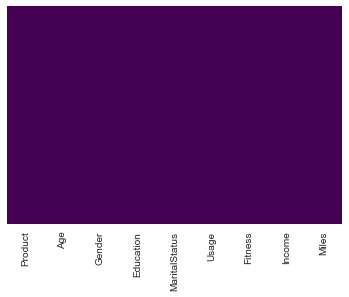

In [97]:
# Above method doesn't show for all data, this chart might help
sns.heatmap(Cardio_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

No Null values. good news. It gives good easy way to look at null values.

In [104]:
Cardio_data.describe() # Check Statistical values

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Observations
1. Income SD values are much spread
2. For Education 50% and 75% quartile values are same
3. Huge difference between 75% and max values of income & miles, suggesting outlieres may be there

In [105]:
Cardio_data.describe(exclude='number') # TO check for non-numerical attributes

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


#### Observations
1. More than half of the Sample is Male, Partnered
2. Gender & Marital Status can be converted to 1/0 column to reduce size of the dataset for Model prep

In [106]:
Cardio_data.isna().sum() # Missing values check

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Points
- No missing values, good sign
- If any missing vlaues where there, we could have try to substitue with meidan values or mode values as required for better analysis

In [156]:
Cardio_data.nunique(axis=0) # check for unique values

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

## Univariate Analysis

In [113]:
 #We shall create a new dataframe only with numerical values
Cardio_data_val = Cardio_data. select_dtypes(include = ['float64','int64'])
Cardio_data_val.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [129]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

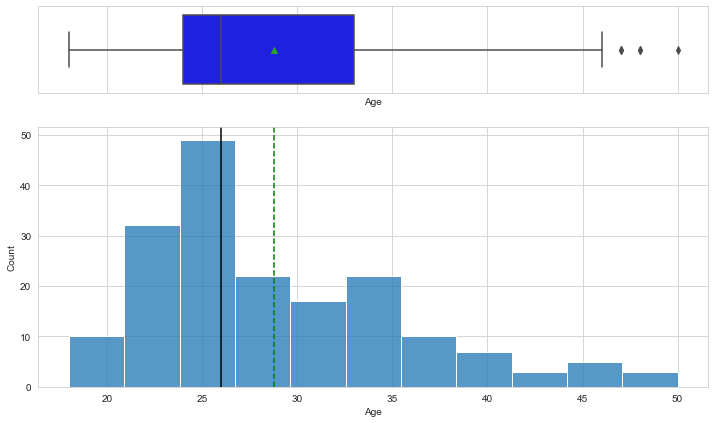

In [130]:
#For Age
histogram_boxplot(Cardio_data_val,'Age')

#### Notes
1. Mean is around 29
2. Outlieres present, so need to tbe ignored for analysis
3. It is left skewed distribution

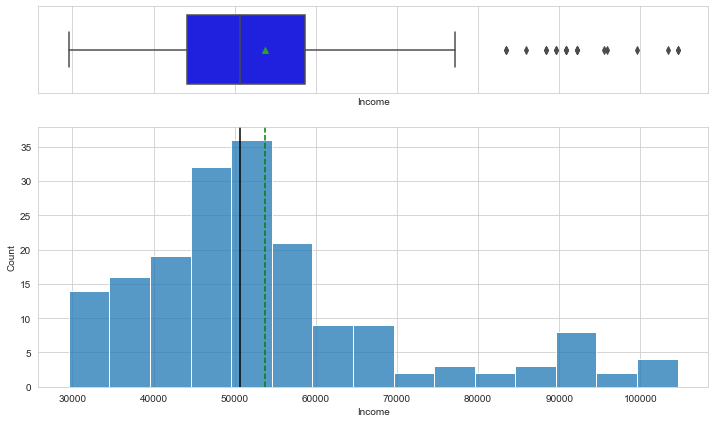

In [131]:
#For Income
histogram_boxplot(Cardio_data_val,'Income')

#### Notes
1. Left Skewed distribution
2. Lot of outliers present

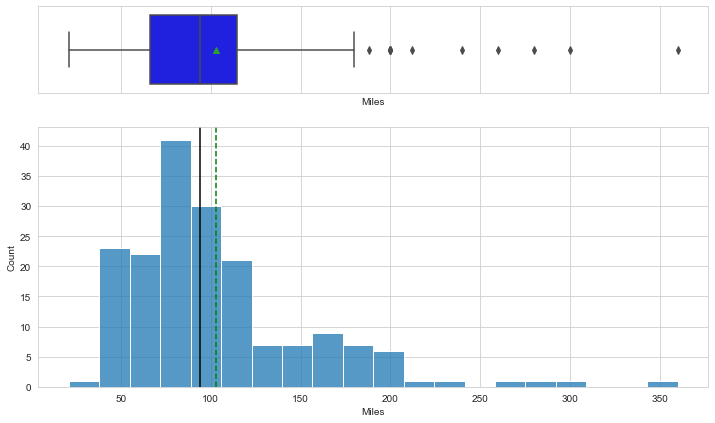

In [132]:
#For Miles
histogram_boxplot(Cardio_data_val,'Miles')

#### Notes
1. Near to normal disctribution with lot of outlier values
2. Miles and Age might have relationship

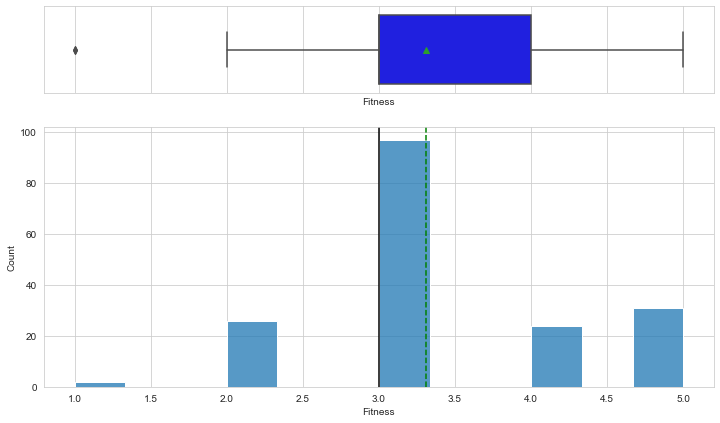

In [168]:
#For Fitness
histogram_boxplot(Cardio_data_val,'Fitness')

#### Notes
- This data may not be useful

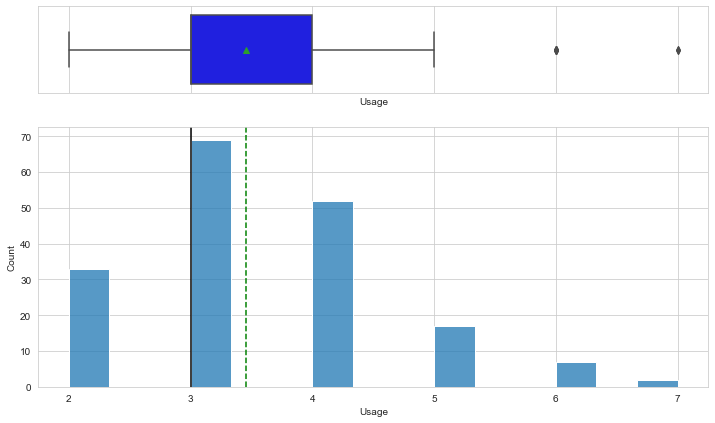

In [136]:
#For Usage
histogram_boxplot(Cardio_data_val,'Usage')

#### Notes
- This data may not be useful

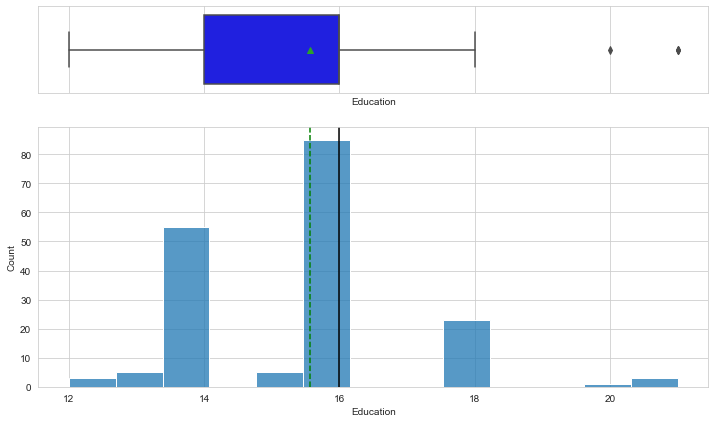

In [169]:
#For Education
histogram_boxplot(Cardio_data_val,'Education')

### Analyze data spread

<AxesSubplot:xlabel='Gender', ylabel='count'>

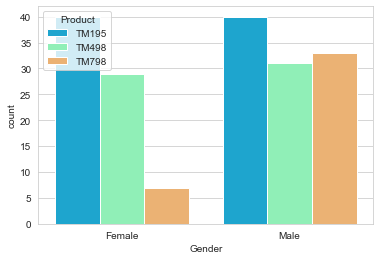

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Product',data=Cardio_data,palette='rainbow')

TM195 Product seems to be more popular, followed by TM498.
Products are evenly peopular among both the sexes

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

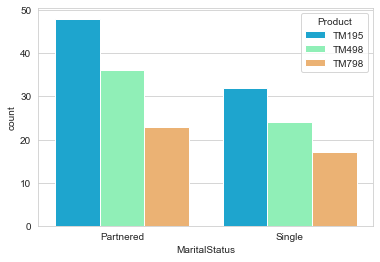

In [138]:
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus',hue='Product',data=Cardio_data,palette='rainbow')

Same Trend as Gender here too

## Bivariate Analysis
### Lets understand the relationship among variables

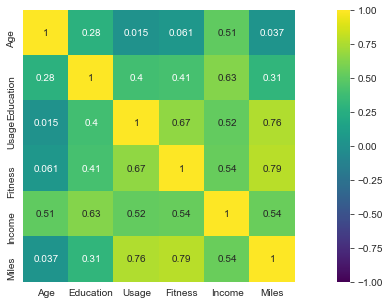

In [148]:
Cardio_corr = Cardio_data_val.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(Cardio_corr,cmap='viridis',vmax=1.0, vmin=-1.0,
            annot=True,square=True)
plt.show()

#### Notes
- As understood, Fitness show high correlation with Miles
- Similary Usage shows high correlation with Miles
- Both of the above observations are not useful for Marketing purposes
- Income shows high Correlation with Education , which might be useful
- Age shows high Correlation with Fitness, good point
- Surprisingly no-negative Correlations

In [150]:
Cardio_data_corr = Cardio_data_val.corr()
Cardio_data_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Bivariate Scatter plots

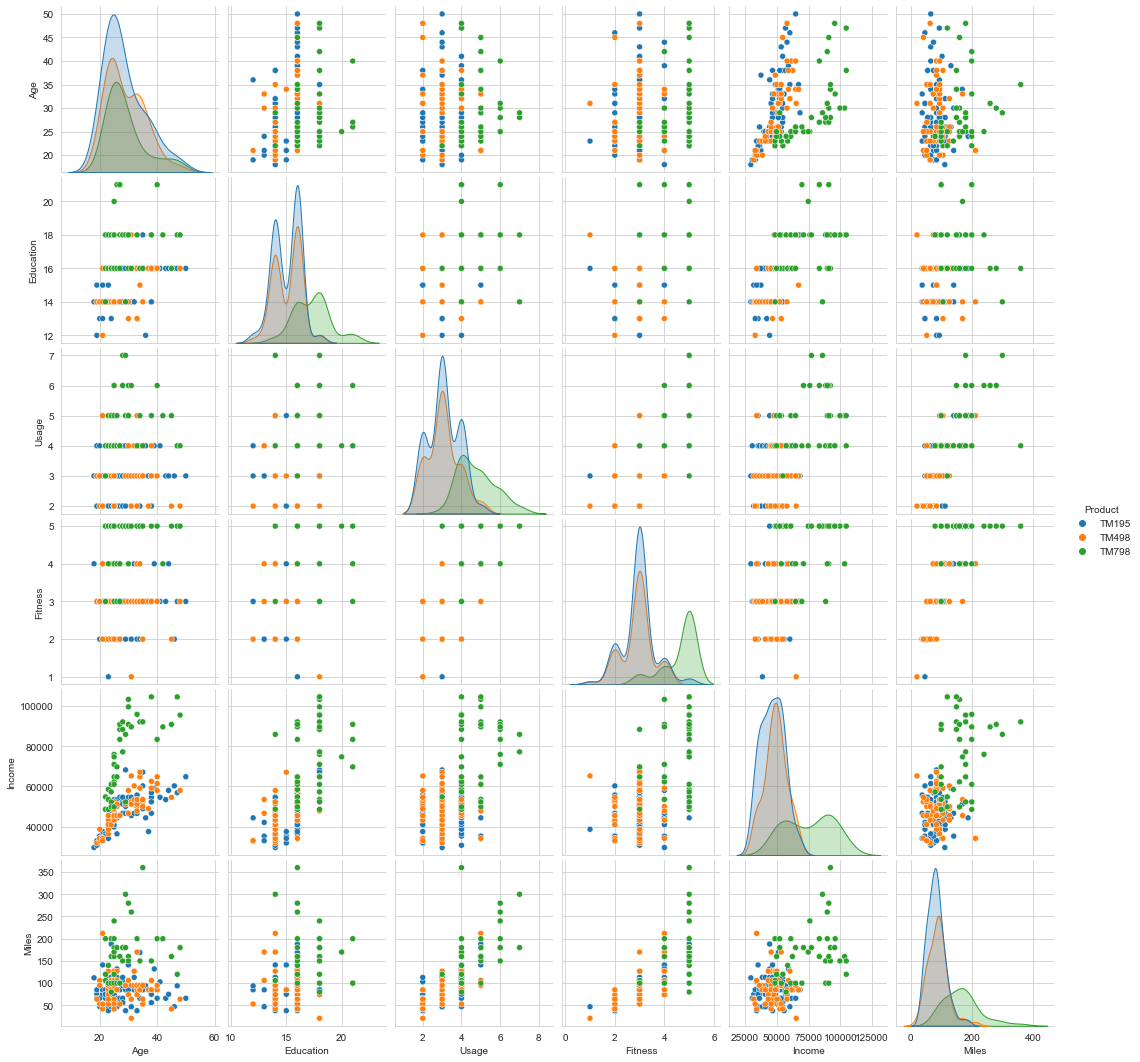

In [147]:
sns.pairplot(Cardio_data,diag_kind="kde",hue="Product")
plt.show()

### Notes
- Some interesting observations plotting the data by product
- TM798 is more popular with people more than average Income
- TM798 users log little more Miles, shows people with little higher income care for more healthy.
- From this data it is obvious Education, Usage & Fitness aren't much useful
- TM195 & TM498 are most popular among people with income less than average

### Products across Age Groups

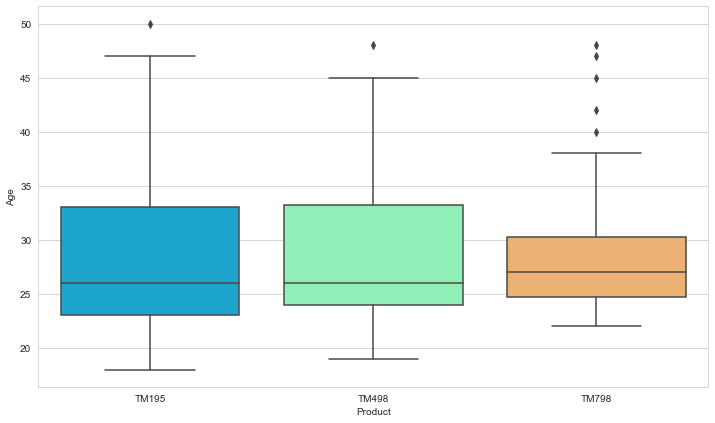

In [155]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Product',y='Age',data=Cardio_data,palette='rainbow')
plt.show()

#### Notes
- Products TM195 & TM498 are obviosuly popular in the Sample. Mean Age group of above 25 & Below 30 indicate,
this product is more popular with Young age group people
- TM798 has more outliers, may be it should be targetted in age group above 30. In overall sample the product % share is around 30%

### Products across Income

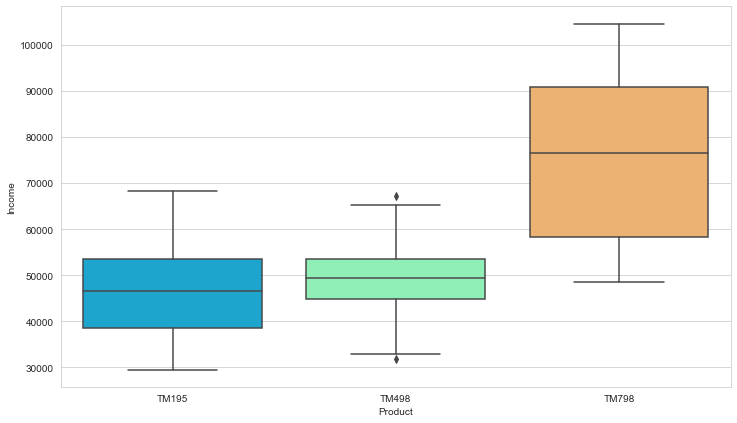

In [154]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Product',y='Income',data=Cardio_data,palette='rainbow')
plt.show()

#### Notes
- Obviously product TM195 is cheapest, next comes TM498 and TM798 is costliest product.
- TM798 has good attention among people who like to run more, so it is for people who want to be more fit.
- Looks like TM195 can be retired, as the characteristic of both the feature (TM195 & TM498) seems to be same.

### Relation between Product & Age

In [157]:
Cardio_data.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

### Relation Between Product & Income

In [158]:
Cardio_data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

### Relation Between Product & Education

In [159]:
Cardio_data.groupby('Product')['Education'].mean()

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

#### Notes
- From above data, it is obvious that TM195 & TM498 has similar audiences, hence TM195 can be retired since it may be cheapest.
- TM 798 has to be researched with more higher income sample to know more insights

In [ ]:
## Multivariate Analysis

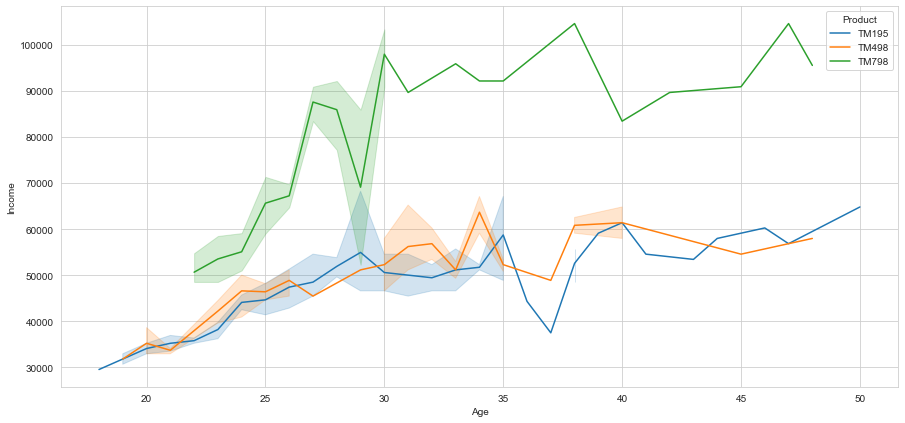

In [162]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Age", y="Income", ci=95, data=Cardio_data, hue='Product')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

#### Notes
- It is quite obvious from the above graph that Product TM195 & TM498 can be substituted for each other
- TM798 is all together to be targetted for High Income people

## Profiling is kind of excercise to validate the EDA done :)

In [166]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(Cardio_data)
# to view report created by pandas profile
prof

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Summary & Recommendations

### Summary
Below is the analysis based on the Cardio fitness data we analyzed across 3 Products. 
- Objective is to Come up with Customer Segmentation for 3 products
- TM195 & TM498 has similar set of audiences, so it can be merged or one of the product can be retired to cut production cost 
and increase revenue for Business
- Mean Age for all 3 product is 28-29 Years.
- TM195 & TM498 are most popular among less than average income people
- TM798 is more popular with people who wants to log more miles, means who want to be more healthy. 
- TM 798 is priced little better can be a huge hit among low income population thus to improve margins.
- Health condition & Occupation of inidividual can be collected for better analysis
- One Important observation is Partnered people are more indicating, they want to be more healthy compared to Single.

### Customer Segmentation for Products
- Based on the data analyzed
- TM195 -- Income Range 35K - 60 K, Partnered, Age between 25-35, Education of 15 Yrs.
- TM498 -- Income Range 35K - 60 K, Partnered, Age between 25-35, Education of 15 Yrs.
- TM798 -- Income Range 58K - 95K, Partnered/Single, Age above 25, Education above 15 yrs.

### Assumptions
- Data is based on assumption that Miles logged is per month